## Summary
Weighted average of the different models - XGBoost, Neural Network, maybe Random Forest? Try different weights?

Try with the second XGBoost model.

In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
loc = os.path.join('/Users','elena','Documents','Kaggle','Allstate','data')

nn = pd.read_csv(os.path.join(loc,'submission_keras.csv'))
xgb = pd.read_csv(os.path.join(loc,'xgboost1.csv'))
xgb2 = pd.read_csv(os.path.join(loc,'xgboost2.csv'))

print len(nn),len(xgb),len(xgb2)

125546 125546 125546


In [3]:
# Simple 50/50 average:
new = (nn['loss'].values+xgb['loss'].values)/2.0

# new_submission = pd.DataFrame({'id':pd.Series(nn['id']),'loss':new})
# new_submission.to_csv(os.path.join(loc,'nn_xgb_avg.csv'),index=False)

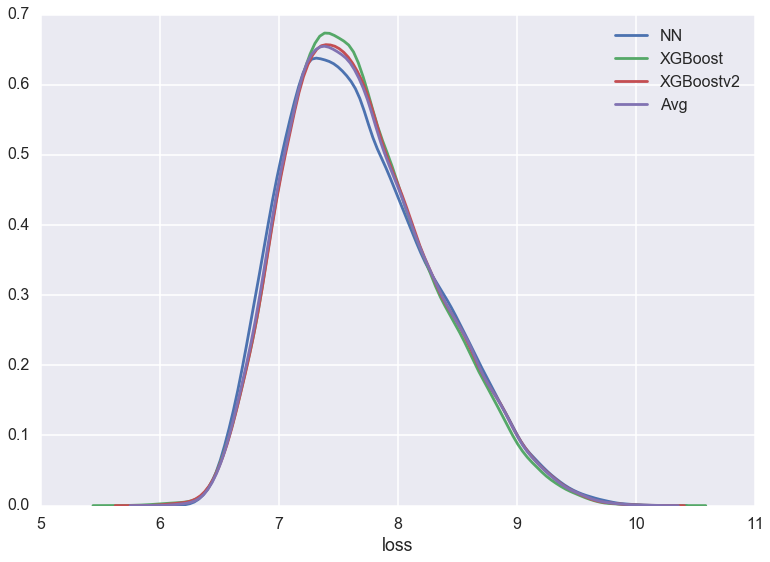

In [7]:
# Try weighted average:
# 0.6 to xgb2, 0.3 to nn, and 0.1 to xgb

newavg = (xgb2['loss'].values*0.6)+(nn['loss'].values*0.3)+(xgb['loss'].values*0.1)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.distplot(np.log1p(nn['loss']),hist=False,label='NN')
sns.distplot(np.log1p(xgb['loss']),hist=False,label='XGBoost')
sns.distplot(np.log1p(xgb2['loss']),hist=False,label='XGBoostv2')
sns.distplot(np.log1p(newavg),hist=False,label='Avg')
plt.legend()

In [9]:
newdf = pd.DataFrame({'id':nn['id'].values,'loss':newavg})
newdf.to_csv(os.path.join(loc,'xbg_nn_xbg_avg.csv'),index=False)